# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.24**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.34**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.24)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.24) / 0.1)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 29.5 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/dataset.zip'

extract_dir = '/content/dataset'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

base_dir = '/content/dataset/dataset'

def unzip_all_zip_files(base_dir):
    for item in os.listdir(base_dir):
        item_path = os.path.join(base_dir, item)
        if item.endswith('.zip'):
            print(f'Extracting: {item_path}')
            with zipfile.ZipFile(item_path, 'r') as zip_ref:
                zip_ref.extractall(base_dir)

unzip_all_zip_files(base_dir)

Mounted at /content/drive
Extracting: /content/dataset/dataset/val.zip
Extracting: /content/dataset/dataset/train.zip


In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
import torch.optim as optim
from tqdm import tqdm
import PIL
from torchvision.models import resnet18
from sklearn.metrics import accuracy_score
from torch.optim import lr_scheduler
from torchvision.transforms import InterpolationMode


In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
config_defaults = {
    'learning_rate': float(0.0025),
    'epochs': int(50),
    'batch_size': int(128),
    'weight_decay': float(5e-4),
}

wandb.init(project='homework 2', config=config_defaults)
config = wandb.config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.RandomErasing(),
        torchvision.transforms.ColorJitter(brightness=.04, contrast=.04, hue=.04, saturation=.04),
        transforms.Normalize((float(0.4819), float(0.4437), float(0.4263)), (float(0.3868), float(0.3724), float(0.3708)))
    ]
                              )
val_transform = transforms.Compose(
[
        transforms.ToTensor(),
        transforms.Normalize((float(0.4819), float(0.4437), float(0.4263)), (float(0.3868), float(0.3724), float(0.3708)))
    ]
)

train_dataset = ImageFolder("/content/dataset/dataset/train", transform=train_transform)
val_dataset = ImageFolder("/content/dataset/dataset/val", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=128, pin_memory=True, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, pin_memory=True, shuffle=False,num_workers=4)

wandb: Currently logged in as: andiva734 (andiva734-higher-school-of-economics). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
len(train_dataset.classes)

100

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

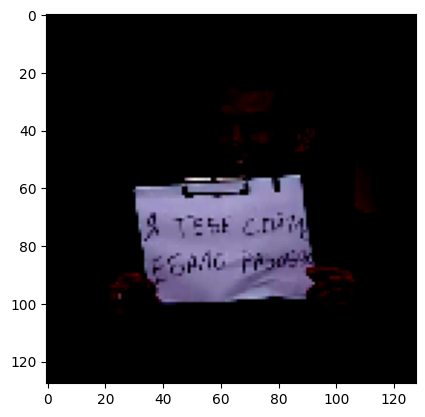

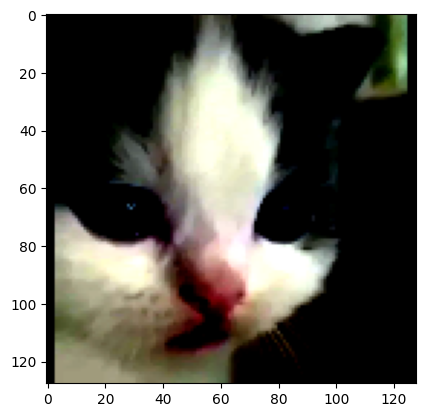

In [ ]:
for batch in val_loader:
    images, class_nums = batch
    plt.imshow(images[12].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
model = resnet18(num_classes=100, pretrained=False).to(device).float()

wandb.watch(model, log='all')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)

steps_per_epoch = len(train_loader)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=config.learning_rate, epochs=config.epochs, steps_per_epoch=steps_per_epoch)

from torch.cuda.amp import GradScaler, autocast
scaler = GradScaler()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-10-23ecec96c375>:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


### Тренировочный класс lightning

In [ ]:
seed_everything(123456)

for epoch in range(config.epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        with autocast(dtype=torch.float32):
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        scheduler.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        if batch_idx % 100 == 0:
            total_norm = 0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            wandb.log({'grad_norm': total_norm})

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct / total

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct / total

    wandb.log({
        'epoch': epoch+1,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy,
        'learning_rate': scheduler.get_last_lr()[0],
    })

    checkpoint = {
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'train_loss': train_loss,
        'val_loss': val_loss,
    }
    torch.save(checkpoint, f'model_epoch_{epoch+1}.pth')
    wandb.save(f'model_epoch_{epoch+1}.pth')

    print(f'Epoch [{epoch+1}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
    if val_accuracy > 0.2279:
      break

print('Training complete.')

print(f"\nОценка за это задание составит {np.clip(5 * val_accuracy / 0.24, 0, 5):.2f} баллов")

<ipython-input-12-8d0c5937b211>:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=torch.float32):


Epoch [1], Train Loss: 3.6450, Train Acc: 0.1367, Val Loss: 3.5199, Val Acc: 0.1480
Epoch [2], Train Loss: 3.4750, Train Acc: 0.1580, Val Loss: 3.4619, Val Acc: 0.1600


<ipython-input-12-8d0c5937b211>:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=torch.float32):
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3], Train Loss: 3.4066, Train Acc: 0.1712, Val Loss: 3.4809, Val Acc: 0.1488
Epoch [4], Train Loss: 3.3688, Train Acc: 0.1763, Val Loss: 3.4862, Val Acc: 0.1684
Epoch [5], Train Loss: 3.3510, Train Acc: 0.1802, Val Loss: 3.4355, Val Acc: 0.1636
Epoch [6], Train Loss: 3.3328, Train Acc: 0.1837, Val Loss: 3.4533, Val Acc: 0.1672
Epoch [7], Train Loss: 3.3350, Train Acc: 0.1815, Val Loss: 3.4675, Val Acc: 0.1604
Epoch [8], Train Loss: 3.3295, Train Acc: 0.1825, Val Loss: 3.4537, Val Acc: 0.1560
Epoch [9], Train Loss: 3.3356, Train Acc: 0.1829, Val Loss: 3.4338, Val Acc: 0.1700
Epoch [10], Train Loss: 3.3401, Train Acc: 0.1812, Val Loss: 3.4380, Val Acc: 0.1584
Epoch [11], Train Loss: 3.3438, Train Acc: 0.1815, Val Loss: 3.4491, Val Acc: 0.1712
Epoch [12], Train Loss: 3.3427, Train Acc: 0.1817, Val Loss: 3.4306, Val Acc: 0.1688
Epoch [13], Train Loss: 3.3420, Train Acc: 0.1828, Val Loss: 3.4748, Val Acc: 0.1648
Epoch [14], Train Loss: 3.3315, Train Acc: 0.1846, Val Loss: 3.4028, Val

In [ ]:
print(f"\nОценка за это задание составит {np.clip(5 * val_accuracy / 0.24, 0, 5):.2f} баллов")


Оценка за это задание составит 4.75 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.34. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
train_transform = torchvision.transforms.Compose(
    [
        transforms.Resize(128),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.RandomErasing(),
        torchvision.transforms.ColorJitter(brightness=.04, contrast=.04, hue=.04, saturation=.04),
        transforms.Normalize((0.4819, 0.4437, 0.4263), (0.3868, 0.3724, 0.3708))
    ]
                              )
val_transform = transforms.Compose(
[
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize((0.4819, 0.4437, 0.4263), (0.3868, 0.3724, 0.3708))
    ]
)

train_dataset = ImageFolder("/content/dataset/dataset/train", transform=train_transform)
val_dataset = ImageFolder("/content/dataset/dataset/val", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=128, pin_memory=True, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, pin_memory=True, shuffle=False,num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Тренировочный класс lightning, и тут же модель:)

In [ ]:
class YourModule2(pl.LightningModule):
    def __init__(self, learning_rate=0.0002):
        super().__init__()
        self.model = resnet18(pretrained=True)
        self.model.fc = nn.Linear(self.model.fc.in_features, 100)
        self.learning_rate = learning_rate
        ct = 0
        for child in self.model.children():
            ct += 1
            if ct < 6:
                for param in child.parameters():
                    param.requires_grad = False

        self.loss = nn.CrossEntropyLoss()
        self.save_hyperparameters()
    @torch.autocast(device_type="cuda")
    def forward(self, x):
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=3, gamma=0.1)
        return [self.optimizer], [scheduler]
        #return self.optimizer
    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss2", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        preds = torch.argmax(torch.softmax(preds, dim=1), dim=1)
        acc = accuracy_score(target.cpu(), preds.cpu())
        self.log("val_loss2", loss, prog_bar=True)
        self.log("accuracy2", acc, prog_bar=True)

In [ ]:
wandb.init(project='homework 2 task 2')

wandb_logger2 = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda" if torch.cuda.is_available() else "cpu"


module2 = YourModule2()

accuracy2,▁▄▆██
epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆████████
train_loss2,███▇▆▆▇▆▇▆▇▆▆▆▄▄▅▅▅▅▅▄▃▃▂▂▂▂▂▁▂▁▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss2,█▄▃▁▂
accuracy2,0.3016
epoch,4
train_loss2,1.65723
trainer/global_step,1784
val_loss2,2.95906


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.0009120108393559097
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_6f9ef512-9d0a-45e0-88f9-cae7b4857d64.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_6f9ef512-9d0a-45e0-88f9-cae7b4857d64.ckpt


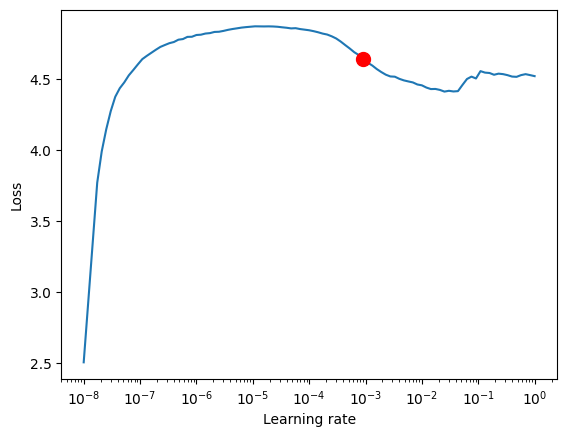

In [ ]:
from pytorch_lightning.tuner.tuning import Tuner

seed_everything(42)
trainer2 = pl.Trainer(logger=wandb_logger2, accelerator=device, max_epochs=5)


#tuner = Tuner(trainer2)
#lr_finder =tuner.lr_find(module2,train_dataloader,val_dataloader)

#fig = lr_finder.plot(suggest=True)
#fig.show()

#new_lr = lr_finder.suggestion()

#module2.learning_rate = new_lr

#wandb_logger2.log_hyperparams({"lr": new_lr})

In [ ]:
seed_everything(42)

trainer2.fit(module2, train_loader, val_loader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | ResNet           | 11.2 M | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
11.1 M    Trainable params
157 K     Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
run = wandb.run
checkpoint_reference = "andiva734-higher-school-of-economics/homework 2 task 2/model-evf2ccsm:v4"

# download checkpoint locally (if not already cached)
artifact = run.use_artifact(checkpoint_reference, type="model")
artifact_dir = artifact.download()

wandb: Downloading large artifact model-evf2ccsm:v4, 127.41MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.6


### Валидация результатов задания

In [ ]:
model = YourModule2.load_from_checkpoint(artifact_dir + "/model.ckpt")

def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()

    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    acc = accuracy_score(
        predicted_classes.cpu().detach().numpy(),
        true_classes.cpu().detach().numpy())

    return acc

accuracy = evaluate_task(model, val_loader)
print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.24) / 0.1, 0, 5):.2f} баллов")
print(accuracy)


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 20/20 [00:02<00:00,  7.34it/s]

Оценка за это задание составит 3.08 баллов
0.3016


Задание 1:

0. Сначала без zerograd accuracy было 0.1332

1. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/qv17vvmr, тут 3 эпохи, 3 слоя, zerograd, LR 0.0005, accuracy 0.1816

2. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/tgf4jjso, тут 5 эпох, 3 слоя, zerograd, LR 0.0005, accuracy 0.1592 (эпох лучше не добавлять)

3. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/9xayigab, тут 3 эпохи, 3 слоя, zerograd, LR 0.005, accuracy 0.1328 (lr лучше не увеличивать)

4. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/6akxr1a7, тут 3 эпохи, 3 слоя, zerograd, LR 0.0001, accuracy 0.1664 (lr лучше не уменьшать)

5. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/uoawqbgc, тут 3 эпохи, 3 слоя, zerograd, LR 0.0005, dropout 0.1, accuracy 0.1553 (dropout не помогает)

6.  https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/5ucrwury тут 3 эпохи, 3 слоя, zerograd, LR 0.0005, dropout 0.1, и не Adam, а SGD, accuracy 0.1470 (оставим Adam)

7. Я решил повторить код, который давал 0.1816, и он дал 0.1319, и теперь я грущу... p.s. все предыдущие выводы недействительны

8. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/gfev3xpx переставил местами conv и batchnorm, получил accuracy 0.1411 (теперь навсегда поменяю)

9. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/w354kop8 тут 5 эпох, 3 слоя, zerograd, LR 0.0001, dropout 0.1, accuracy 0.2091 (победа!)

10. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/8i9z49qq тут 5 эпох, 3 слоя, zerograd, LR 0.00005, dropout 0.1, accuracy 0.1940 (слишком низкий lr тоже плохо)

11. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/8i9z49qq тут 5 эпох, 3 слоя, zerograd, LR 0.00008, dropout 0.1, accuracy 0.1550 (все, оставлем LR 0.0001)

12. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/qjg6t3tl тут 5 эпох, 3 слоя, zerograd, LR 0.00008, dropout 0.2, accuracy 0.1511 (и dropout не трогаем)

На этом моменте я сдался и решил переписать все с нуля и взять resnet, и не делать через классы

13. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/axzatjx4?nw=nwuserandiva734 lr = 0.01 и accuracy 0.2120

14. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/t4z8lk2u?nw=nwuserandiva734 lr = 0.005, 45 эпох (потом GPU кончился) и accuracy 0.2112

15. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/yfhx36lw?nw=nwuserandiva734 lr=0.001, 40 эпох, accuracy 0.1960


16. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/bx5yv6e4?nw=nwuserandiva734 lr=0.001, Adam, 40 эпох, accuracy было до 0.218, но на последней эпохе 0.2076

17. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/0iduszwa?nw=nwuserandiva734 lr=0.0025, 40 эпох, accuracy было до 0.2220, на финальном 0.2134

18. https://wandb.ai/andiva734-higher-school-of-economics/homework%202/runs/xudzyz5x?nw=nwuserandiva734 lr=0.0025, 50 эпох, но сделал break на 44 (до этого проверил, что на этой эпохе лучшая , так как там максимальный accuracy 0.228

Задание 2:

Я сначала просто перебирал предобученные модели, и получалось качество максимум 0.14, и мне даже стыдно такое прикреплять

1. https://wandb.ai/andiva734-higher-school-of-economics/homework%202%20task%202?nw=nwuserandiva734 тут обучение на convnext_base(weights = ConvNeXt_Base_Weights.IMAGENET1K_V1), LR = 0.00005, было accuracy 0.1948, но это бесконечно долго обучалось, потом GPU кончилось, и я забил, и решил сделать с нуля

2. https://wandb.ai/andiva734-higher-school-of-economics/homework%202%20task%202/runs/evf2ccsm?nw=nwuserandiva734 и получил вот такое с accuracy 0.3016